# TMDB EDA
Name: Michael McCann
Last Updetd: 30 APR 2022


## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

## Load and Inspect Data

In [2]:
tmdb_2k = pd.read_csv('data/final_tmdb_data_2000.csv.gz')
tmdb_2k1 = pd.read_csv('data/final_tmdb_data_2001.csv.gz')

In [3]:
display(tmdb_2k.head())
print('\n\n')
tmdb_2k.info()

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tt0113026,0.0,/vMFs7nw6P0bIV1jDsQpxAieAVnH.jpg,NaN,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",NaN,62127.0,en,The Fantasticks,...,0.0,86.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Try to remember the first time magic happened,The Fantasticks,0.0,5.4,21.0,NaN
2,tt0113092,0.0,NaN,NaN,0.0,"[{'id': 878, 'name': 'Science Fiction'}]",NaN,110977.0,en,For the Cause,...,0.0,100.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,The ultimate showdown on a forbidden planet.,For the Cause,0.0,4.4,7.0,NaN
3,tt0116391,0.0,NaN,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",NaN,442869.0,hi,Gang,...,0.0,152.0,"[{'english_name': 'Hindi', 'iso_639_1': 'hi', ...",Released,NaN,Gang,0.0,0.0,0.0,NaN
4,tt0118694,0.0,/n4GJFGzsc7NinI1VeGDXIcQjtU2.jpg,NaN,150000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",http://www.wkw-inthemoodforlove.com/,843.0,cn,花樣年華,...,12854953.0,99.0,"[{'english_name': 'Cantonese', 'iso_639_1': 'c...",Released,"Feel the heat, keep the feeling burning, let t...",In the Mood for Love,0.0,8.1,1860.0,PG





<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_id                1197 non-null   object 
 1   adult                  1196 non-null   float64
 2   backdrop_path          608 non-null    object 
 3   belongs_to_collection  107 non-null    object 
 4   budget                 1196 non-null   float64
 5   genres                 1196 non-null   object 
 6   homepage               65 non-null     object 
 7   id                     1196 non-null   float64
 8   original_language      1196 non-null   object 
 9   original_title         1196 non-null   object 
 10  overview               1172 non-null   object 
 11  popularity             1196 non-null   float64
 12  poster_path            1051 non-null   object 
 13  production_companies   1196 non-null   object 
 14  production_countries   1196 non-null   object 
 15  r

In [4]:
display(tmdb_2k1.head())
print('\n\n')
tmdb_2k1.info()

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tt0035423,0.0,/hfeiSfWYujh6MKhtGTXyK3DD4nN.jpg,NaN,48000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 14, 'nam...",NaN,11232.0,en,Kate & Leopold,...,76019048.0,118.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,If they lived in the same century they'd be pe...,Kate & Leopold,0.0,6.3,1103.0,PG-13
2,tt0114447,0.0,NaN,NaN,0.0,"[{'id': 53, 'name': 'Thriller'}, {'id': 28, 'n...",NaN,151007.0,en,The Silent Force,...,0.0,90.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,They left him for dead... They should have fin...,The Silent Force,0.0,5.0,3.0,NaN
3,tt0118589,0.0,/bLntSfsqUheiUirdV9Ts8znqsTM.jpg,NaN,22000000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",NaN,10696.0,en,Glitter,...,5271666.0,104.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,"In music she found her dream, her love, herself.",Glitter,0.0,4.6,115.0,PG-13
4,tt0118652,0.0,/mWxJEFRMvkG4UItYJkRDMgWQ08Y.jpg,NaN,1000000.0,"[{'id': 9648, 'name': 'Mystery'}, {'id': 27, '...",NaN,17140.0,en,The Attic Expeditions,...,0.0,100.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,His search for peace of mind... will leave his...,The Attic Expeditions,0.0,5.0,27.0,R





<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1277 entries, 0 to 1276
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_id                1277 non-null   object 
 1   adult                  1276 non-null   float64
 2   backdrop_path          631 non-null    object 
 3   belongs_to_collection  85 non-null     object 
 4   budget                 1276 non-null   float64
 5   genres                 1276 non-null   object 
 6   homepage               106 non-null    object 
 7   id                     1276 non-null   float64
 8   original_language      1276 non-null   object 
 9   original_title         1276 non-null   object 
 10  overview               1247 non-null   object 
 11  popularity             1276 non-null   float64
 12  poster_path            1106 non-null   object 
 13  production_companies   1276 non-null   object 
 14  production_countries   1276 non-null   object 
 15  r

## Merge DataFrames

In [5]:
tmdb_merged = pd.concat([tmdb_2k, tmdb_2k1], ignore_index = True)
tmdb_merged

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tt0113026,0.0,/vMFs7nw6P0bIV1jDsQpxAieAVnH.jpg,NaN,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",NaN,62127.0,en,The Fantasticks,...,0.0,86.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Try to remember the first time magic happened,The Fantasticks,0.0,5.4,21.0,NaN
2,tt0113092,0.0,NaN,NaN,0.0,"[{'id': 878, 'name': 'Science Fiction'}]",NaN,110977.0,en,For the Cause,...,0.0,100.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,The ultimate showdown on a forbidden planet.,For the Cause,0.0,4.4,7.0,NaN
3,tt0116391,0.0,NaN,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",NaN,442869.0,hi,Gang,...,0.0,152.0,"[{'english_name': 'Hindi', 'iso_639_1': 'hi', ...",Released,NaN,Gang,0.0,0.0,0.0,NaN
4,tt0118694,0.0,/n4GJFGzsc7NinI1VeGDXIcQjtU2.jpg,NaN,150000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",http://www.wkw-inthemoodforlove.com/,843.0,cn,花樣年華,...,12854953.0,99.0,"[{'english_name': 'Cantonese', 'iso_639_1': 'c...",Released,"Feel the heat, keep the feeling burning, let t...",In the Mood for Love,0.0,8.1,1860.0,PG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2469,tt7797670,0.0,NaN,NaN,0.0,"[{'id': 27, 'name': 'Horror'}]",NaN,956214.0,en,Edmund Kemper Part 2: La Mort C'est La Vie,...,0.0,91.0,[],Released,NaN,Edmund Kemper Part 2: La Mort C'est La Vie,0.0,0.0,0.0,NaN
2470,tt7797790,0.0,NaN,NaN,0.0,"[{'id': 27, 'name': 'Horror'}]",NaN,956219.0,en,Edmund Kemper Part 3: La mort sévit,...,0.0,72.0,"[{'english_name': 'French', 'iso_639_1': 'fr',...",Released,NaN,Edmund Kemper Part 3: La mort sévit,0.0,0.0,0.0,NaN
2471,tt8665056,0.0,NaN,NaN,0.0,"[{'id': 37, 'name': 'Western'}]",http://skeletoncreekproductions.com/p-movie-br...,885436.0,en,Guns Along The Bravo,...,0.0,85.0,[],Released,Evil came to the Southwest until three blazing...,Guns Along The Bravo,0.0,0.0,0.0,NaN
2472,tt8795764,0.0,NaN,NaN,0.0,"[{'id': 27, 'name': 'Horror'}]",https://www.utahwolf.com/films/coming-soon-new...,871624.0,en,New Breed,...,0.0,57.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,NaN,New Breed,0.0,0.0,0.0,NR


## EDA

In [6]:
budget = tmdb_merged['budget'] > 0
revenue = tmdb_merged['revenue'] > 0

print(f'Only {budget.sum()} database entries for 2000/2001 have budget information.')
print(f'Only {revenue.sum()} database entries for 2000/2001 have revenue information.')

Only 536 database entries for 2000/2001 have budget information.
Only 425 database entries for 2000/2001 have revenue information.


In [7]:
tmdb_fin = tmdb_merged[budget | revenue]

In [20]:
tmdb_fin.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 615 entries, 1 to 2454
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   imdb_id                615 non-null    object  
 1   adult                  615 non-null    float64 
 2   backdrop_path          507 non-null    object  
 3   belongs_to_collection  102 non-null    object  
 4   budget                 615 non-null    float64 
 5   genres                 615 non-null    object  
 6   homepage               78 non-null     object  
 7   id                     615 non-null    float64 
 8   original_language      615 non-null    object  
 9   original_title         615 non-null    object  
 10  overview               612 non-null    object  
 11  popularity             615 non-null    float64 
 12  poster_path            592 non-null    object  
 13  production_companies   615 non-null    object  
 14  production_countries   615 non-null    ob

In [24]:
tmdb_fin['certification'].isna().sum()

193

In [26]:
tmdb_fin.groupby('certification')['id'].count().sort_values(ascending = False, na_position = 'last')

TypeError: sort_values() got an unexpected keyword argument 'dropna'

### Viz: Distriubution by Rating

G:\Program Files (x86)\anaconda3\envs\dojo-env\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


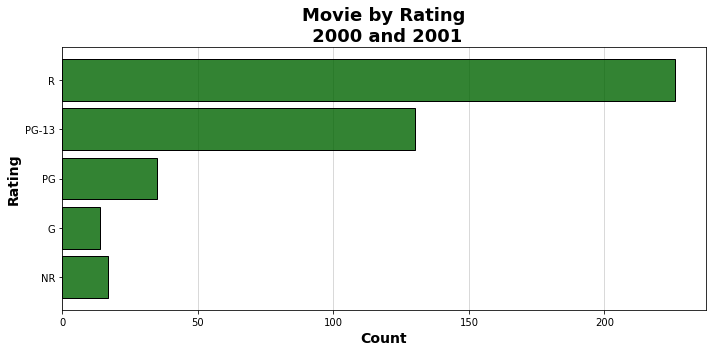

In [9]:
## Set certification to a categorical ordering
tmdb_fin['certification'] = pd.Categorical(tmdb_fin['certification'],
                                           ['R','PG-13','PG','G', 'NR'])
## Visualize Distribution by Rating
fig, ax = plt.subplots(figsize = (10,5))
sns.histplot(y = tmdb_fin['certification'], 
             color = "#006400", alpha = .8, shrink = .85)
plt.title('Movie by Rating\n 2000 and 2001', 
             fontsize = 18, weight = 'bold')
plt.xlabel('Count', fontsize=14, weight = 'semibold')
plt.ylabel('Rating',  fontsize=14, weight = 'semibold')
plt.grid(axis = 'x', alpha = .6)
ax.set_axisbelow(True)
fig.tight_layout()

### Viz: Mean Budget and Revenue by Rating

In [10]:
tmdb_fin.groupby('certification')['budget'].mean().sort_values(ascending = False)

certification
PG       4.497857e+07
PG-13    4.348391e+07
G        4.085714e+07
R        2.028827e+07
NR       6.388241e+06
Name: budget, dtype: float64

In [11]:
tmdb_fin.groupby('certification')['revenue'].mean().sort_values(ascending = False)

certification
G        1.237085e+08
PG       1.111773e+08
PG-13    9.957933e+07
R        3.324591e+07
NR       8.887611e+06
Name: revenue, dtype: float64

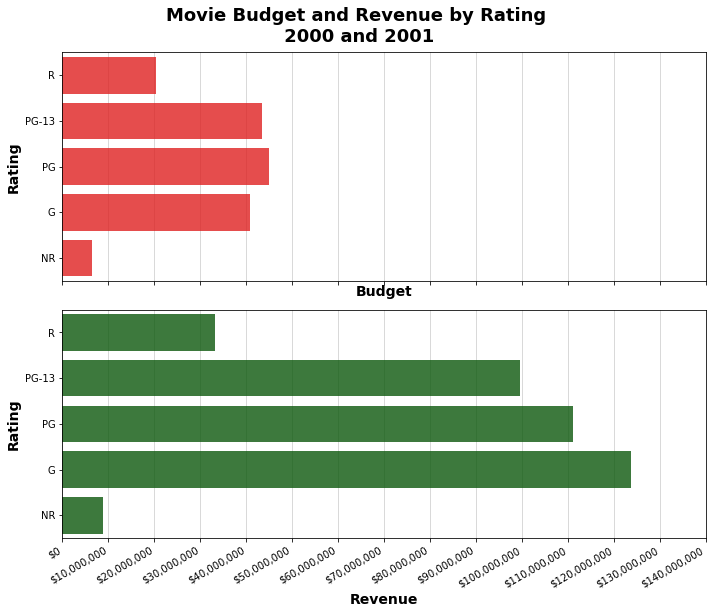

In [12]:
from matplotlib.ticker import StrMethodFormatter

fig, axes = plt.subplots(figsize=(10,8), nrows = 2, sharex = True)
plt.suptitle('Movie Budget and Revenue by Rating\n 2000 and 2001', 
             fontsize = 18, weight = 'bold', y = 1.06)
sns.barplot(data = tmdb_fin, x = 'budget', y = 'certification', 
            ci = None, color = "red", alpha = .8, ax = axes[0])
axes[0].set_xlabel('Budget', fontsize=14, weight = 'semibold')
axes[0].set_ylabel('Rating',  fontsize=14, weight = 'semibold')
sns.barplot(data = tmdb_fin, x = 'revenue', y = 'certification', 
            ci = None, color = "#006400", alpha = .8, ax = axes[1])
axes[1].set_xlabel('Revenue', fontsize=14, weight = 'semibold')
axes[1].set_ylabel('Rating',  fontsize=14, weight = 'semibold')
[ax.grid(axis = 'x', alpha = .6) for ax in axes]
[ax.set_axisbelow(True) for ax in axes]
axes[1].xaxis.set_major_formatter(StrMethodFormatter('${x:,.0f}'))
plt.xlim(0,140000000)
plt.xticks(range(0, 141000000, 10000000),rotation = 30, ha = 'right')
fig.tight_layout()

### Viz: Relationship between Budget and Revenue

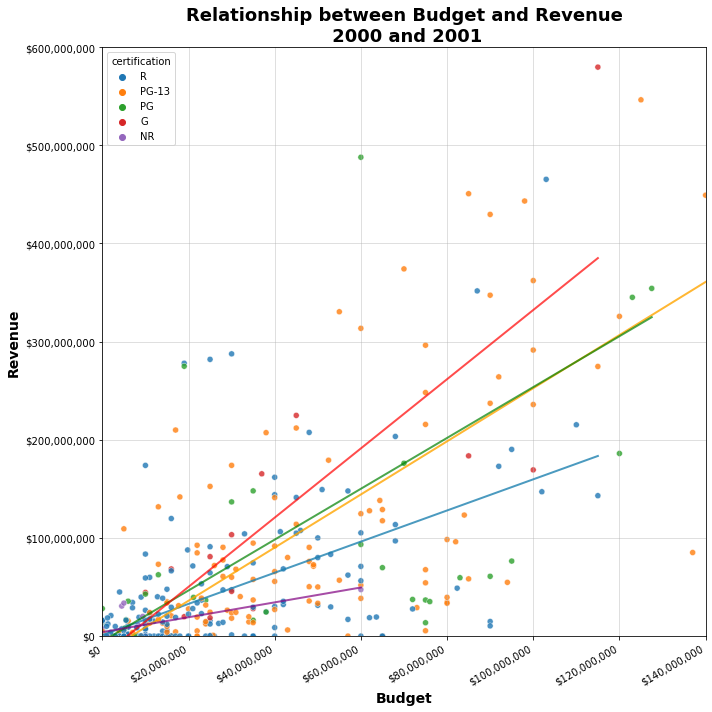

In [13]:
fig, ax = plt.subplots(figsize = (10,10))
sns.scatterplot(data = tmdb_fin, x = 'budget', y = 'revenue', hue = "certification", alpha = .8);
sns.regplot(data=tmdb_fin[tmdb_fin['certification'] == 'R'], x = 'budget', y = 'revenue', 
            scatter_kws={'s':0}, ci=None,
            line_kws={'color': '#1e81b0', 'lw' : 2, 'alpha' : .8})
sns.regplot(data=tmdb_fin[tmdb_fin['certification'] == 'PG-13'], x = 'budget', y = 'revenue', 
            scatter_kws={'s':0}, ci=None,
            line_kws={'color': "orange", 'lw' : 2, 'alpha' : .8})
sns.regplot(data=tmdb_fin[tmdb_fin['certification'] == 'PG'], x = 'budget', y = 'revenue', 
            scatter_kws={'s':0}, ci=None,
            line_kws={'color': "green", 'lw' : 2, 'alpha' : .7})
sns.regplot(data=tmdb_fin[tmdb_fin['certification'] == 'G'], x = 'budget', y = 'revenue', 
            scatter_kws={'s':0}, ci=None,
            line_kws={'color': "red", 'lw' : 2, 'alpha' : .7})
sns.regplot(data=tmdb_fin[tmdb_fin['certification'] == 'NR'], x = 'budget', y = 'revenue', 
            scatter_kws={'s':0}, ci=None,
            line_kws={'color': "purple", 'lw' : 2, 'alpha' : .7})
plt.title('Relationship between Budget and Revenue\n 2000 and 2001', 
             fontsize = 18, weight = 'bold')
plt.xlabel('Budget', fontsize=14, weight = 'semibold')
plt.ylabel('Revenue',  fontsize=14, weight = 'semibold')
ax.xaxis.set_major_formatter(StrMethodFormatter('${x:,.0f}'))
ax.yaxis.set_major_formatter(StrMethodFormatter('${x:,.0f}'))
plt.xlim(0,140000000)
plt.ylim(0,600000000)
plt.grid(alpha = .5)
plt.xticks(rotation = 30, ha = 'right')
fig.tight_layout()